In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# 1. Load Dataset
df = pd.read_csv("D:/1.UNI 5th Semester/6. Advance DataBase/ADVANCE_DB PROJECT/ds_project/mellyapp/ml/performa.csv")

# 2. Encode Gender & Performance Category
le_gender = LabelEncoder()
le_perf = LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])  # Male/Female => 0/1
df['performance_category'] = le_perf.fit_transform(df['performance_category'])  # A/B/C/D => 0/1/2/3

# 3. Feature Selection
X = df[['gender', 'age', 'total_activities', 'avg_task_duration_minutes','course_id']]
y = df['performance_category']

# 4. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 6. Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Evaluation
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_perf.classes_))

# # 8. Save Model & Encoders
# joblib.dump(model, 'multiclass_rf_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')
# joblib.dump(le_perf, 'label_encoder_perf.pkl')
# joblib.dump(le_gender, 'label_encoder_gender.pkl')

# print("\n✅ Model and encoders saved successfully.")


Confusion Matrix:
[[ 9 10  5  8]
 [ 8 13  2  5]
 [ 4  5  1  5]
 [11  5  2  3]]

Classification Report:
              precision    recall  f1-score   support

           A       0.28      0.28      0.28        32
           B       0.39      0.46      0.43        28
           C       0.10      0.07      0.08        15
           D       0.14      0.14      0.14        21

    accuracy                           0.27        96
   macro avg       0.23      0.24      0.23        96
weighted avg       0.26      0.27      0.26        96



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import joblib

# 1. Load Dataset
df = pd.read_csv("D:/1.UNI 5th Semester/6. Advance DataBase/ADVANCE_DB PROJECT/ds_project/mellyapp/ml/performa.csv")

# 2. Encode Gender & Performance Category
le_gender = LabelEncoder()
le_perf = LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])  # Male/Female => 0/1
df['performance_category'] = le_perf.fit_transform(df['performance_category'])  # A/B/C/D => 0/1/2/3

# 3. Feature Selection
X = df[['gender', 'age', 'total_activities', 'avg_task_duration_minutes']]
y = df['performance_category']

# 4. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le_perf.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_estimators=100
)

xgb_model.fit(X_train, y_train)

# 7. Evaluation
y_pred = xgb_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_perf.classes_))

# # 8. Save Model & Encoders
# joblib.dump(xgb_model, 'xgboost_multiclass_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')
# joblib.dump(le_perf, 'label_encoder_perf.pkl')
# joblib.dump(le_gender, 'label_encoder_gender.pkl')

# print("\n✅ XGBoost model and encoders saved successfully.")


d:\1.UNI 5th Semester\6. Advance DataBase\ADVANCE_DB PROJECT\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[13  8  5  4]
 [12  9  1  6]
 [ 6  5  4  5]
 [ 7  9  1  1]]

Classification Report:
              precision    recall  f1-score   support

           A       0.34      0.43      0.38        30
           B       0.29      0.32      0.31        28
           C       0.36      0.20      0.26        20
           D       0.06      0.06      0.06        18

    accuracy                           0.28        96
   macro avg       0.26      0.25      0.25        96
weighted avg       0.28      0.28      0.27        96



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import joblib

# 1. Load Dataset
df = pd.read_csv("D:/1.UNI 5th Semester/6. Advance DataBase/ADVANCE_DB PROJECT/ds_project/mellyapp/ml/perform_2.csv")

# 2. Label Encoding
le_gender = LabelEncoder()
le_perf = LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])  # Male/Female → 0/1
df['performance_category'] = le_perf.fit_transform(df['performance_category'])  # A/B/C/D → 0/1/2/3

# 3. Feature Selection (pakai semua fitur baru)
features = [
    'gender', 'age',
    'total_activities', 'avg_task_duration_minutes',
    'quiz_count', 'assignment_count', 'forum_count',
    'avg_quiz_duration', 'activity_per_day', 'activity_variability'
]

X = df[features]
y = df['performance_category']

# 4. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 6. XGBoost Training
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le_perf.classes_),
    eval_metric='mlogloss',
    random_state=42,
    n_estimators=150,
    learning_rate=0.1,
    max_depth=5
)
xgb_model.fit(X_train, y_train)

# 7. Evaluation
y_pred = xgb_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_perf.classes_))

# # 8. Save Model dan Encoder
# joblib.dump(xgb_model, 'xgboost_multiclass_model_v2.pkl')
# joblib.dump(scaler, 'scaler_v2.pkl')
# joblib.dump(le_perf, 'label_encoder_perf_v2.pkl')
# joblib.dump(le_gender, 'label_encoder_gender_v2.pkl')

# print("\n✅ Model dan encoder berhasil disimpan.")


Confusion Matrix:
[[12  7  5  6]
 [12 12  3  1]
 [ 5  9  1  5]
 [ 6  7  3  2]]

Classification Report:
              precision    recall  f1-score   support

           A       0.34      0.40      0.37        30
           B       0.34      0.43      0.38        28
           C       0.08      0.05      0.06        20
           D       0.14      0.11      0.12        18

    accuracy                           0.28        96
   macro avg       0.23      0.25      0.23        96
weighted avg       0.25      0.28      0.26        96



Missing values before cleaning:
 gender                         0
age                            0
total_activities               0
avg_task_duration_minutes      0
quiz_count                     0
assignment_count               0
forum_count                    0
avg_quiz_duration            389
activity_per_day               0
activity_variability           0
grade                          0
dtype: int64

📊 Evaluation Metrics:
MAE  : 15.65
RMSE : 18.22
R²   : -0.48


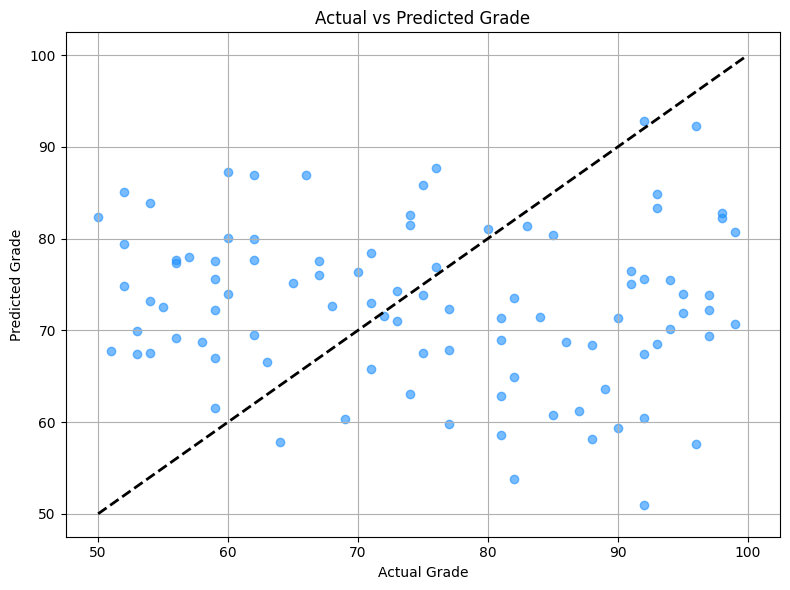

In [8]:
# ===============================================
# 🎓 REGRESI: Prediksi Nilai Akhir Mahasiswa (Grade)
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import joblib

# 1. Load Dataset
df = pd.read_csv('D:/1.UNI 5th Semester/6. Advance DataBase/ADVANCE_DB PROJECT/ds_project/mellyapp/ml/grade.csv')

# 2. Drop ID columns (stu_id, course_id)
df = df.drop(columns=['stu_id', 'course_id'])

# 3. Cek Missing Values
print("Missing values before cleaning:\n", df.isnull().sum())

# 4. Imputasi Missing Value
df['avg_quiz_duration'] = df['avg_quiz_duration'].fillna(df['avg_quiz_duration'].median())

# 5. Encode Gender
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])  # Male = 1, Female = 0

# 6. Feature & Target Definition
features = [
    'gender', 'age', 'total_activities', 'quiz_count',
    'assignment_count', 'forum_count', 'avg_task_duration_minutes',
    'activity_per_day', 'activity_variability', 'avg_quiz_duration'
]
X = df[features]
y = df['grade']

# 7. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 9. Train XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 10. Evaluation
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluation Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

# 11. Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")
plt.title("Actual vs Predicted Grade")
plt.grid(True)
plt.tight_layout()
plt.savefig("predicted_vs_actual.png")
plt.show()

# # 12. Save Model & Preprocessors
# joblib.dump(xgb_model, 'xgb_regressor.pkl')
# joblib.dump(scaler, 'scaler.pkl')
# joblib.dump(le_gender, 'label_encoder_gender.pkl')
# print("\n✅ Model and encoders saved successfully.")
